In [124]:
#%pip install ipykernel
#!python3 -m venv .venv
#!source .venv/bin/activate
#!./.venv/bin/python -m pip install pandas numpy matplotlib statsmodels scipy ipykernel
#%pip install numpy matplotlib statsmodels scipy pandas

## Setup

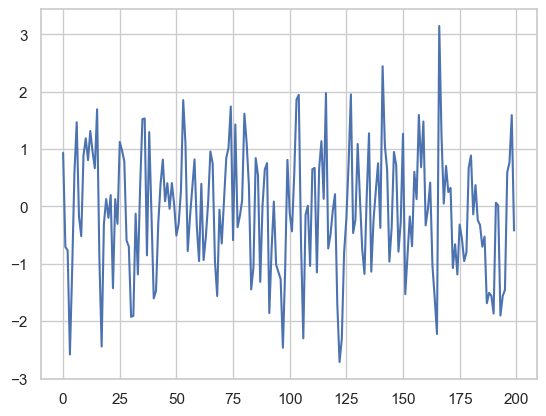

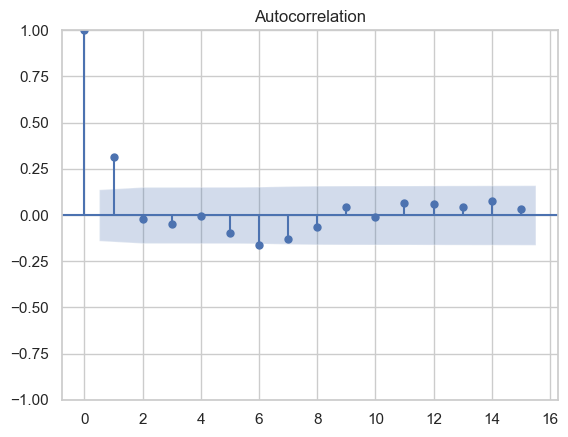

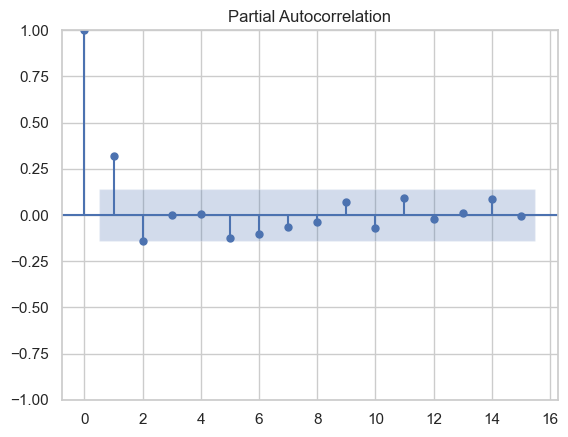

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Session2sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series4 # CHANGE THE SERIES HERE

num_lags=15 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()

## Is the Data Stationary?

Check the ADF test.

If p-value > 0.05 then Ho is not fullfilled aka the data IS stationary.

You can also check the plot_acf and plot_pacf. Verify the data points are within the confidence interval [in blue] to determine if the mean and the variance are estable and therefore stationary. 

In [126]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

if adf_test[1] > 0.05:
    print("Result: The process is not stationary")
else:
    print("Result: The process is stationary")

ADF test for the original series
Statistic Value: -9.34260232483718
p-value: 8.715406413810424e-16
Result: The process is stationary


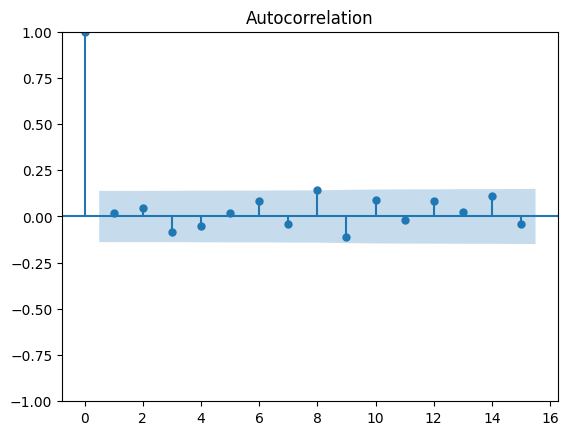

## Is the Data Uncorrelated?

Check the box test. 

If lb_pvalue of the test > 0.05 then data is Uncorrelated.

You can also check in the autocorrelation plot, if there are any bars outside of the confidence interval.

In [127]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

if saphiro[1] > 0.05:
    print("Result: The residuals are normally distributed")
else:
    print("Result: The residuals are not normally distributed")

import statsmodels.api as sm
print("")
print("Box test")
box_test = sm.stats.acorr_ljungbox(y, lags=[15], return_df=True)
print(box_test)

if box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The residuals are independent")
else:
    print("Result: The residuals are not independent")

Saphiro ShapiroResult(statistic=np.float64(0.9960222070553456), pvalue=np.float64(0.8850600012324977))
Result: The residuals are normally distributed

Box test
     lb_stat  lb_pvalue
15  36.59481    0.00145
Result: The residuals are not independent


## Is the Data Normally Distributed?

Check the saphiro test.

If p-value = 0 then is NOT normally distributed

**Visual Inspection:**

- Histogram: Plot a histogram of the data.
- Q-Q Plot: Plot a quantile-quantile plot to compare the distribution of the data to a normal distribution.

**Statistical Tests:**

- Shapiro-Wilk Test: A statistical test for normality.

**Visual Inspection**

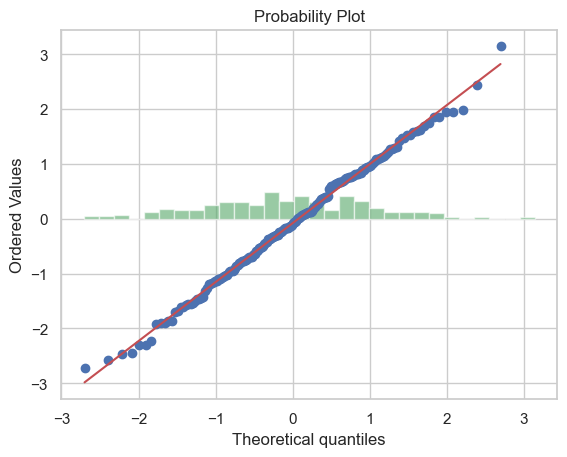

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.hist(y, bins=30, density=True, alpha=0.6, color='g')

# Q-Q Plot
stats.probplot(y, dist="norm", plot=plt)
plt.show()

**Statistical Tests**

In [129]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(y)
print('Shapiro-Wilk Test: Statistic=%.3f, p-value=%.3f' % (shapiro_stat, shapiro_p))

if shapiro_p > 0.05:
    print("Result: The residuals are normally distributed")
else:
    print("Result: The residuals are not normally distributed")

Shapiro-Wilk Test: Statistic=0.996, p-value=0.885
Result: The residuals are normally distributed


## Is the Data White Noise?

WN = Uncorrelated data + mean == 0

- Zero Mean: The data should have a mean of zero.
- Constant Variance: The data should have a constant variance over time.
- No Autocorrelation: The data should have no significant autocorrelation at any lag.


Mean: -0.08069499999999998
Variance: 1.1326045419750002


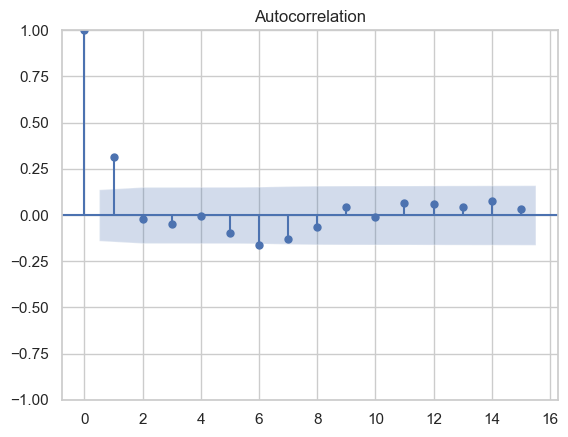

Result: The data is not white noise


In [130]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Check zero mean
mean = np.mean(y)
print("Mean:", mean)

# Check constant variance
variance = np.var(y)
print("Variance:", variance)

# Check for no autocorrelation
plot_acf(y, lags=15)
plt.show()

# Perform the Ljung-Box test
box_test = acorr_ljungbox(y, lags=[15], return_df=True)

# Check if the data is white noise
if abs(mean) < 1e-10 and variance > 0 and box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The data is white noise")
else:
    print("Result: The data is not white noise")

## Do we need a Linear Model?

If the data is uncorrelated we don't need a Linear Model, because there's no relationship between the present and the past.


In [131]:
# Check if we need a linear model
if adf_test[1] > 0.05:
    print("The data is not stationary, consider differencing or other transformations.")
elif box_test['lb_pvalue'].iloc[0] > 0.05:
    print("The data is uncorrelated, a linear model may not be necessary.")
else:
    print("The data is stationary and correlated, consider using a linear model.")


The data is stationary and correlated, consider using a linear model.


## Is the data Gaussian White Noise?

- Normality: The data should be normally distributed.
- Zero Mean: The data should have a mean of zero.
- Constant Variance: The data should have a constant variance over time.
- No Autocorrelation: The data should have no significant autocorrelation at any lag.

Shapiro-Wilk Test: Statistic=0.996, p-value=0.885
Mean: -0.08069499999999998
Variance: 1.1326045419750002


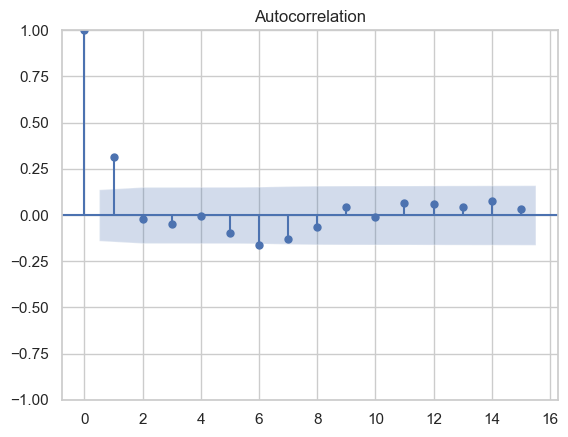

Result: The data is not Gaussian white noise


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf

# Check normality
stat, p = shapiro(y)
print('Shapiro-Wilk Test: Statistic=%.3f, p-value=%.3f' % (stat, p))

# Check zero mean
mean = np.mean(y)
print("Mean:", mean)

# Check constant variance
variance = np.var(y)
print("Variance:", variance)

# Check for no autocorrelation
plot_acf(y, lags=15)
plt.show()

# Check if the data is Gaussian white noise
if p > 0.05 and abs(mean) < 1e-10 and variance > 0 and box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The data is Gaussian white noise")
else:
    print("Result: The data is not Gaussian white noise")

## Is the data Strict White Noise? (Independency)

- Zero Mean: The data should have a mean of zero.
- Constant Variance: The data should have a constant variance over time.
- No Autocorrelation: The data should have no significant autocorrelation at any lag.

Mean: -0.08069499999999998
Variance: 1.1326045419750002


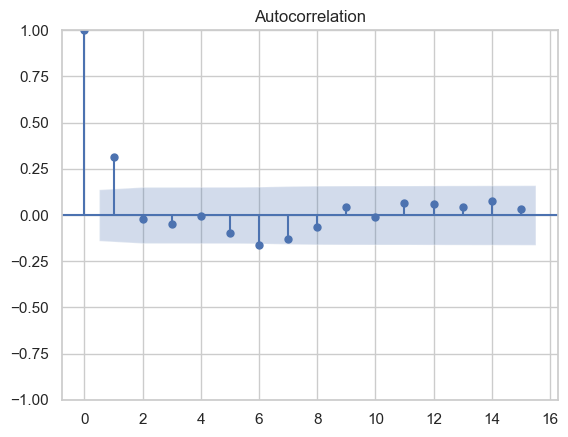

Result: The data is not strict white noise


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Check zero mean
mean = np.mean(y)
print("Mean:", mean)

# Check constant variance
variance = np.var(y)
print("Variance:", variance)

# Check for no autocorrelation
plot_acf(y, lags=15)
plt.show()

# Check if the data is strict white noise
if abs(mean) < 1e-10 and variance > 0 and box_test['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The data is strict white noise")
else:
    print("Result: The data is not strict white noise")

## Is the data Independent?

Independent Data = Normal Distribution + Uncorrelated Data

If the data is independent you cannot predict any model from my random variable aka no nonlinear model is used.

- Check for No Autocorrelation: You can use the autocorrelation function (ACF) plot to check for autocorrelation. If the autocorrelation values are within the confidence intervals (usually shown as dashed lines), it indicates no significant autocorrelation, suggesting that the data points are independent.

- Perform the Ljung-Box Test: The Ljung-Box test is a statistical test that can be used to check for the absence of autocorrelation in a time series.

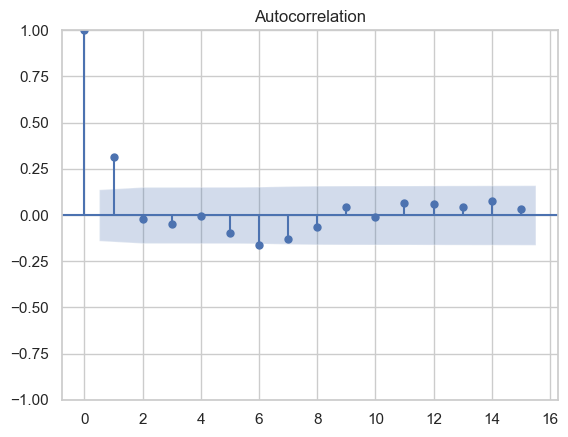

     lb_stat  lb_pvalue
15  36.59481    0.00145
Shapiro-Wilk Test: Statistic=0.996, p-value=0.885
Result: The data is not independent


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Check for no autocorrelation using ACF plot
plot_acf(y, lags=15)
plt.show()

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(y, lags=[15], return_df=True)
print(lb_test)

# Check if the data is independent by checking for autocorrelation and normal distribution

stat, p = shapiro(y)
print('Shapiro-Wilk Test: Statistic=%.3f, p-value=%.3f' % (stat, p))

if p > 0.05 and lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The data is independent")
else:
    print("Result: The data is not independent")


## Do we need transformations?

If the data is stationary we DON'T need a transformation.

In [135]:
# Check if we need transformations
if adf_test[1] > 0.05:
    print("The data is not stationary, consider differencing or other transformations.")
else:
    print("The data is stationary, no transformation is needed.")

The data is stationary, no transformation is needed.


## Do I need a non linear model?

If the squares are correlated and I don't need th variance, it cannot be predicted.

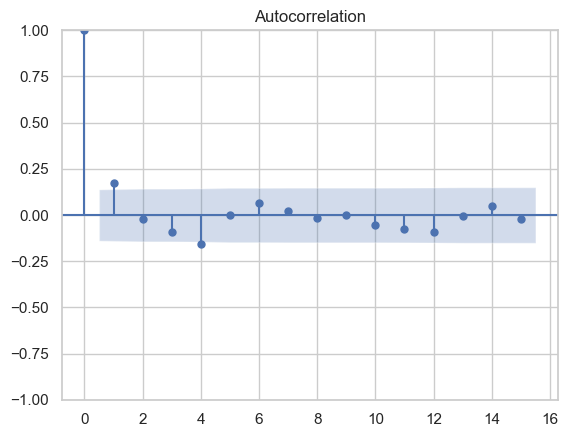

      lb_stat  lb_pvalue
15  18.085483   0.258198
Result: The squared residuals are not correlated, a non-linear model may not be necessary.


In [136]:
# Check for autocorrelation in the squared residuals
squared_residuals = y ** 2
plot_acf(squared_residuals, lags=num_lags)
plt.show()

# Perform the Ljung-Box test on the squared residuals
lb_test_squared = sm.stats.acorr_ljungbox(squared_residuals, lags=[num_lags], return_df=True)
print(lb_test_squared)

if lb_test_squared['lb_pvalue'].iloc[0] > 0.05:
    print("Result: The squared residuals are not correlated, a non-linear model may not be necessary.")
else:
    print("Result: The squared residuals are correlated, consider using a non-linear model.")

## Summary of Results

In [137]:
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

series_list = [series1, series2, series3, series4, series5, series6]
results = {}

for i, series in enumerate(series_list, start=1):
    # Perform ADF Test
    adf_test = adfuller(series)
    
    # Perform Ljung-Box Test
    box_test = acorr_ljungbox(series, lags=[15], return_df=True)
    
    # Perform Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(series)
    
    # Calculate mean and variance
    mean = np.mean(series)
    variance = np.var(series)
    
    # Perform Ljung-Box Test on Squared Residuals
    squared_residuals = np.square(series - mean)
    lb_test_squared = acorr_ljungbox(squared_residuals, lags=[15], return_df=True)
    
    # Summary dictionary for each series
    summary = {
        "Stationarity": {
            "Result": "The process is stationary" if adf_test[1] <= 0.05 else "The process is not stationary",
            "Test": "ADF Test",
            "Statistic Value": adf_test[0],
            "p-value": adf_test[1]
        },
        "Independence of Residuals": {
            "Result": "The residuals are independent" if box_test['lb_pvalue'].iloc[0] > 0.05 else "The residuals are not independent",
            "Test": "Box Test",
            "Statistic Value": box_test['lb_stat'].iloc[0],
            "p-value": box_test['lb_pvalue'].iloc[0]
        },
        "Normality of Residuals": {
            "Result": "The residuals are normally distributed" if shapiro_p > 0.05 else "The residuals are not normally distributed",
            "Test": "Shapiro-Wilk Test",
            "Statistic Value": shapiro_stat,
            "p-value": shapiro_p
        },
        "Ljung-Box Test on Squared Residuals": {
            "Result": "The squared residuals are not correlated" if lb_test_squared['lb_pvalue'].iloc[0] > 0.05 else "The squared residuals are correlated",
            "Test": "Ljung-Box Test on Squared Residuals",
            "Statistic Value": lb_test_squared['lb_stat'].iloc[0],
            "p-value": lb_test_squared['lb_pvalue'].iloc[0]
        },
        "Gaussian White Noise": {
            "Result": "The data is Gaussian white noise" if shapiro_p > 0.05 and abs(mean) < 1e-10 and variance > 0 and box_test['lb_pvalue'].iloc[0] > 0.05 else "The data is not Gaussian white noise",
            "Test": "Shapiro-Wilk Test, Mean, Variance, Box Test",
            "Mean": mean,
            "Variance": variance,
            "Shapiro-Wilk p-value": shapiro_p,
            "Box Test p-value": box_test['lb_pvalue'].iloc[0]
        },
        "Strict White Noise": {
            "Result": "The data is strict white noise" if abs(mean) < 1e-10 and variance > 0 and box_test['lb_pvalue'].iloc[0] > 0.05 else "The data is not strict white noise",
            "Test": "Mean, Variance, Box Test",
            "Mean": mean,
            "Variance": variance,
            "Box Test p-value": box_test['lb_pvalue'].iloc[0]
        },
        "Independence": {
            "Result": "The data is independent" if box_test['lb_pvalue'].iloc[0] > 0.05 else "The data is not independent",
            "Test": "Box Test",
            "Box Test p-value": box_test['lb_pvalue'].iloc[0]
        },
        "Need for Linear Model": {
            "Result": "The data is stationary and correlated, consider using a linear model." if adf_test[1] <= 0.05 and box_test['lb_pvalue'].iloc[0] <= 0.05 else "The data is not stationary, consider differencing or other transformations." if adf_test[1] > 0.05 else "The data is uncorrelated, a linear model may not be necessary.",
            "Test": "ADF Test, Box Test",
            "ADF Test p-value": adf_test[1],
            "Box Test p-value": box_test['lb_pvalue'].iloc[0]
        },
        "Need for Non-Linear Model": {
            "Result": "The squared residuals are correlated, consider using a non-linear model." if lb_test_squared['lb_pvalue'].iloc[0] <= 0.05 else "The squared residuals are not correlated, a non-linear model may not be necessary.",
            "Test": "Ljung-Box Test on Squared Residuals",
            "Ljung-Box Test on Squared Residuals p-value": lb_test_squared['lb_pvalue'].iloc[0]
        }
    }
    
    results[f"Series {i}"] = summary

# Print the results for each series
for series_name, summary in results.items():
    print(f"{series_name}:")
    for key, value in summary.items():
        print(f"  {key}:")
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                print(f"    {sub_key}: {sub_value}")
        else:
            print(f"    {value}")
    print()



Series 1:
  Stationarity:
    Result: The process is stationary
    Test: ADF Test
    Statistic Value: -8.376629517817943
    p-value: 2.575739394962956e-13
  Independence of Residuals:
    Result: The residuals are independent
    Test: Box Test
    Statistic Value: 17.593559919344116
    p-value: 0.28463552298306066
  Normality of Residuals:
    Result: The residuals are normally distributed
    Test: Shapiro-Wilk Test
    Statistic Value: 0.9913571048208412
    p-value: 0.27933535301477885
  Ljung-Box Test on Squared Residuals:
    Result: The squared residuals are not correlated
    Test: Ljung-Box Test on Squared Residuals
    Statistic Value: 18.203380951501234
    p-value: 0.2521242469070779
  Gaussian White Noise:
    Result: The data is not Gaussian white noise
    Test: Shapiro-Wilk Test, Mean, Variance, Box Test
    Mean: 2.025175
    Variance: 1.178387484375
    Shapiro-Wilk p-value: 0.27933535301477885
    Box Test p-value: 0.28463552298306066
  Strict White Noise:
    Re

## Summary of Results

### 1. Is the Data Stationary?
- **Condition:** If the p-value of the ADF test is less than or equal to 0.05.
- **Result:** The process is stationary.

### 2. Is the Data Uncorrelated?
- **Condition:** If the lb_pvalue of the Box test is greater than 0.05.
- **Result:** The residuals are independent.

### 3. Is the Data Normally Distributed?
- **Condition:** If the p-value of the Shapiro-Wilk test is greater than 0.05.
- **Result:** The residuals are normally distributed.

### 4. Is the Data White Noise?
- **Condition:** If the mean is approximately zero, the variance is greater than zero, and the lb_pvalue of the Box test is greater than 0.05.
- **Result:** The data is white noise.

### 5. Is the Data Gaussian White Noise?
- **Condition:** If the p-value of the Shapiro-Wilk test is greater than 0.05, the mean is approximately zero, the variance is greater than zero, and the lb_pvalue of the Box test is greater than 0.05.
- **Result:** The data is Gaussian white noise.

### 6. Is the Data Strict White Noise?
- **Condition:** If the mean is approximately zero, the variance is greater than zero, and the lb_pvalue of the Box test is greater than 0.05.
- **Result:** The data is strict white noise.

### 7. Is the Data Independent?
- **Condition:** If the p-value of the Shapiro-Wilk test is greater than 0.05 and the lb_pvalue of the Box test is greater than 0.05.
- **Result:** The data is independent.

### 8. Do We Need a Linear Model?
- **Condition:** If the p-value of the ADF test is less than or equal to 0.05 and the lb_pvalue of the Box test is less than or equal to 0.05.
- **Result:** The data is stationary and correlated, consider using a linear model.

### 9. Do We Need a Non-Linear Model?
- **Condition:** If the lb_pvalue of the Ljung-Box test on squared residuals is less than or equal to 0.05.
- **Result:** The squared residuals are correlated, consider using a non-linear model.

### 10. Do We Need Transformations?
- **Condition:** If the p-value of the ADF test is greater than 0.05.
- **Result:** The data is not stationary, consider differencing or other transformations.

In [138]:
%pip install Jinja2

import pandas as pd
import seaborn as sns

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict({(i, j): results[i][j] 
                           for i in results.keys() 
                           for j in results[i].keys()},
                       orient='index')

# Save the DataFrame to a CSV file
#results_df.to_csv('results_summary.csv')

# Display the DataFrame in a nicer format
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Display the DataFrame in a nicer format
styled_results_df = results_df.style.background_gradient(cmap='viridis').set_properties(**{'text-align': 'left'})
styled_results_df




Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [139]:
summary_results = []

for series_name, summary in results.items():
    summary_results.append({
        "Series": series_name,
        "Stationary": "YES" if summary['Stationarity']['p-value'] <= 0.05 else "NO",
        "Stationary Reason": f"p-value: {summary['Stationarity']['p-value']:.5f}",
        "Marginal Normal distribution": "YES" if summary['Normality of Residuals']['p-value'] > 0.05 else "NO",
        "Normal Distribution Reason": f"p-value: {summary['Normality of Residuals']['p-value']:.5f}",
        "WN (uncorrelated)": "YES" if summary['Independence of Residuals']['p-value'] > 0.05 else "NO",
        "WN Reason": f"p-value: {summary['Independence of Residuals']['p-value']:.5f}",
        "SWN (independent)": "YES" if summary['Strict White Noise']['Box Test p-value'] > 0.05 else "NO",
        "SWN Reason": f"p-value: {summary['Strict White Noise']['Box Test p-value']:.5f}",
        "GWN": "YES" if summary['Gaussian White Noise']['Shapiro-Wilk p-value'] > 0.05 and abs(summary['Gaussian White Noise']['Mean']) < 1e-10 and summary['Gaussian White Noise']['Variance'] > 0 and summary['Gaussian White Noise']['Box Test p-value'] > 0.05 else "NO",
        "GWN Reason": f"Shapiro-Wilk p-value: {summary['Gaussian White Noise']['Shapiro-Wilk p-value']:.5f}, Mean: {summary['Gaussian White Noise']['Mean']:.5f}, Variance: {summary['Gaussian White Noise']['Variance']:.5f}, Box Test p-value: {summary['Gaussian White Noise']['Box Test p-value']:.5f}",
        "Linear model (mean)": "YES" if summary['Need for Linear Model']['Result'].startswith("The data is stationary and correlated") else "NO",
        "Linear Model Reason": summary['Need for Linear Model']['Result'],
        "Nonlinear model (variance)": "YES" if summary['Need for Non-Linear Model']['Result'].startswith("The squared residuals are correlated") else "NO",
        "Nonlinear Model Reason": summary['Need for Non-Linear Model']['Result'],
        "Transformations": "YES" if summary['Stationarity']['p-value'] > 0.05 else "NO",
        "Transformations Reason": f"p-value: {summary['Stationarity']['p-value']:.5f}"
    })

# Convert the summary results to a DataFrame for better visualization
summary_df = pd.DataFrame(summary_results)

# Display the DataFrame grouped by series and shown vertically
summary_df.set_index('Series').T

# Display the DataFrame in a more readable format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

summary_df.set_index('Series').T

# Add the test performed to get each result
summary_df['Stationary'] = summary_df.apply(lambda row: f"{row['Stationary']} (ADF Test)", axis=1)
summary_df['Marginal Normal distribution'] = summary_df.apply(lambda row: f"{row['Marginal Normal distribution']} (Shapiro-Wilk Test)", axis=1)
summary_df['WN (uncorrelated)'] = summary_df.apply(lambda row: f"{row['WN (uncorrelated)']} (Box Test)", axis=1)
summary_df['SWN (independent)'] = summary_df.apply(lambda row: f"{row['SWN (independent)']} (Box Test)", axis=1)
summary_df['GWN'] = summary_df.apply(lambda row: f"{row['GWN']} (Shapiro-Wilk Test, Mean, Variance, Box Test)", axis=1)
summary_df['Linear model (mean)'] = summary_df.apply(lambda row: f"{row['Linear model (mean)']} (ADF Test, Box Test)", axis=1)
summary_df['Nonlinear model (variance)'] = summary_df.apply(lambda row: f"{row['Nonlinear model (variance)']} (Ljung-Box Test on Squared Residuals)", axis=1)
summary_df['Transformations'] = summary_df.apply(lambda row: f"{row['Transformations']} (ADF Test)", axis=1)

# Display the updated DataFrame grouped by series and shown vertically
summary_df.set_index('Series').T


Series,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6
Stationary,YES (ADF Test),YES (ADF Test),YES (ADF Test),YES (ADF Test),NO (ADF Test),YES (ADF Test)
Stationary Reason,p-value: 0.00000,p-value: 0.00000,p-value: 0.00000,p-value: 0.00000,p-value: 0.58266,p-value: 0.00000
Marginal Normal distribution,YES (Shapiro-Wilk Test),YES (Shapiro-Wilk Test),NO (Shapiro-Wilk Test),YES (Shapiro-Wilk Test),NO (Shapiro-Wilk Test),NO (Shapiro-Wilk Test)
Normal Distribution Reason,p-value: 0.27934,p-value: 0.98659,p-value: 0.00000,p-value: 0.88506,p-value: 0.00007,p-value: 0.00035
WN (uncorrelated),YES (Box Test),YES (Box Test),YES (Box Test),NO (Box Test),NO (Box Test),YES (Box Test)
WN Reason,p-value: 0.28464,p-value: 0.97270,p-value: 0.22969,p-value: 0.00145,p-value: 0.00000,p-value: 0.19168
SWN (independent),YES (Box Test),YES (Box Test),YES (Box Test),NO (Box Test),NO (Box Test),YES (Box Test)
SWN Reason,p-value: 0.28464,p-value: 0.97270,p-value: 0.22969,p-value: 0.00145,p-value: 0.00000,p-value: 0.19168
GWN,"NO (Shapiro-Wilk Test, Mean, Variance, Box Test)","NO (Shapiro-Wilk Test, Mean, Variance, Box Test)","NO (Shapiro-Wilk Test, Mean, Variance, Box Test)","NO (Shapiro-Wilk Test, Mean, Variance, Box Test)","NO (Shapiro-Wilk Test, Mean, Variance, Box Test)","NO (Shapiro-Wilk Test, Mean, Variance, Box Test)"
GWN Reason,"Shapiro-Wilk p-value: 0.27934, Mean: 2.02517, Variance: 1.17839, Box Test p-value: 0.28464","Shapiro-Wilk p-value: 0.98659, Mean: 0.13146, Variance: 0.99413, Box Test p-value: 0.97270","Shapiro-Wilk p-value: 0.00000, Mean: -0.08908, Variance: 2.09111, Box Test p-value: 0.22969","Shapiro-Wilk p-value: 0.88506, Mean: -0.08069, Variance: 1.13260, Box Test p-value: 0.00145","Shapiro-Wilk p-value: 0.00007, Mean: -5.22688, Variance: 16.86910, Box Test p-value: 0.00000","Shapiro-Wilk p-value: 0.00035, Mean: -0.00029, Variance: 0.55922, Box Test p-value: 0.19168"
